<a href="https://colab.research.google.com/github/allenwang0713/tebaml0315/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.scikit learn: sklearn 機器學習

2.pandas:表格處理

3.numpy:多為陣列函式褲

4.opencv:影像處理/AI函式庫

5.Pillow:影像處理

6.matplotlib:視覺化基礎函式庫

7.seaborn:視覺化進階函式庫

資料量需求

1.機器學習: 1k-1w以上

2.深度學習: 1w-10w以上

題目難度 <-> 資料需求

簡單: 少點ok

難: 多一點

題目難度可以參考欄位數目

In [11]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
x = pd.DataFrame(iris["data"], columns=iris["feature_names"])
y = iris["target"]
# 順便複習
total = x[:]
total["ans"] = iris["target"]
total.to_csv("iris.csv", index=False, encoding="utf-8")

<ipython-input-11-d1acc042ba54>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total["ans"] = iris["target"]


先把你的資料分成兩分: 一份訓練/一份驗證

進到sklearn以前: pd.DataFrame

進到sklearn以後(train_test_split): np.array

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
# train_test_split([1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], test_size=1)
x_np = np.array(x)
y_np = np.array(y)
# 90%xnp, 10%xnp, 90%ynp, 10%ynp
x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

決策樹每一層的選擇: 目標(確定程度提高最高) -> Gini(猜錯機率)降低

一顆決策樹 -> 信心程度100%(Gini=0)

$ Gini = ∑ p_i(1-p_i) $

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [47, 43, 45]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 88\nvalue = [0, 43, 45]\nclass = virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.19\nsamples = 47\nvalue = [0, 42, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]\nclass = virginica')]

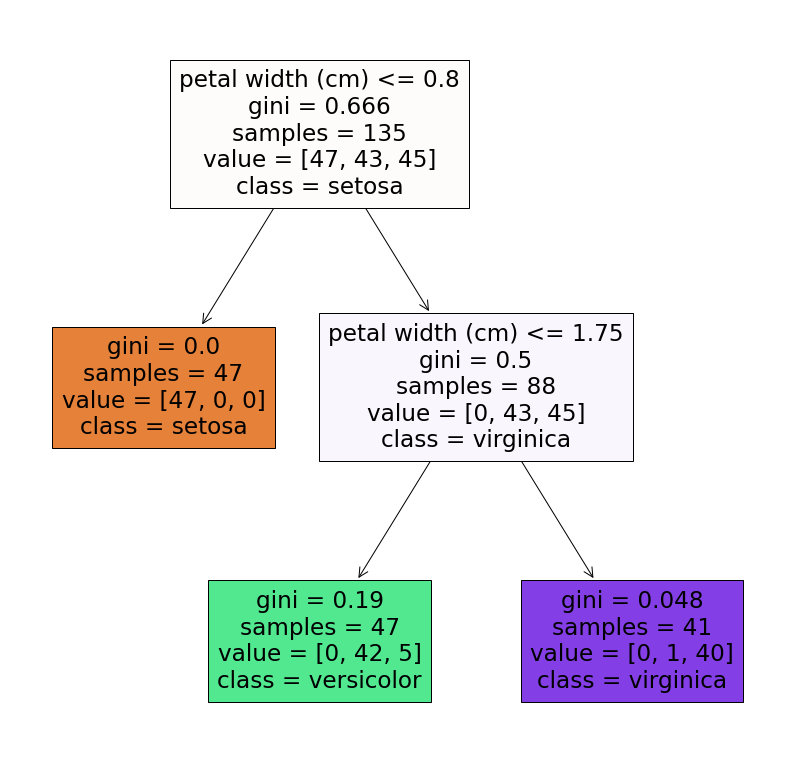

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(clf, 
     feature_names=x.columns, 
     class_names=iris["target_names"],
     filled=True)

In [15]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

1.0

1.模型不要學到完美(學到太多稀少例外導致沒看過的問題錯更多) -> 避免過擬合

2.決策樹優點 -> 可解釋性